## Gather 
#### Import necessary libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
%matplotlib inline

#### Merge the 12 months of sales data into a single CSV file

In [2]:
df = pd.read_csv("./datasets/Sales_April_2019.csv")
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


In [3]:
# get all files names and assign them to a list
files = [file for file in os.listdir("./datasets")]
for file in files:
    print(file)

Sales_April_2019.csv
Sales_August_2019.csv
Sales_December_2019.csv
Sales_February_2019.csv
Sales_January_2019.csv
Sales_July_2019.csv
Sales_June_2019.csv
Sales_March_2019.csv
Sales_May_2019.csv
Sales_November_2019.csv
Sales_October_2019.csv
Sales_September_2019.csv


In [4]:
# use concat() to merge all months data into one DataFrame
all_months_data = pd.DataFrame()
for file in files:
    df = pd.read_csv("./datasets/{}".format(file))
    all_months_data = pd.concat([all_months_data, df], ignore_index=True)

In [5]:
# test
counts = 0
for file in files:
    df = pd.read_csv("./datasets/{}".format(file))
    counts += df.shape[0]
    
if counts == all_months_data.shape[0]:
    print('True')

True


In [6]:
all_months_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


#### Drop the empty rows

In [7]:
# drop whole rows which all columns are NaN
all_months_data.dropna(how='all', inplace=True)

#### Save it as a new file

In [8]:
all_months_data.to_csv("./datasets/all_data.csv", index=False)

In [9]:
all_data = pd.read_csv("./datasets/all_data.csv")
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
2,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
3,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"


## Assess

In [10]:
all_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 186305 entries, 0 to 186304
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Order ID          186305 non-null  object
 1   Product           186305 non-null  object
 2   Quantity Ordered  186305 non-null  object
 3   Price Each        186305 non-null  object
 4   Order Date        186305 non-null  object
 5   Purchase Address  186305 non-null  object
dtypes: object(6)
memory usage: 8.5+ MB


#### Note: 
- Wrong data type of Quantity Ordered and Price Each column.


## Clean

In [13]:
df = all_data.copy()

#### Fix the wrong data type

In [34]:
# use pd.to_numeric() to get the proper data type
df['Quantity Ordered'] = pd.to_numeric(df['Quantity Ordered'])
df['Price Each'] = pd.to_numeric(df['Price Each'])

In [35]:
# test
print(df[['Quantity Ordered', 'Price Each']].dtypes)

Quantity Ordered      int32
Price Each          float32
dtype: object


#### Add Month colum

In [21]:
df['Month'] = df['Order Date'].str[0:2]
# test
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",04
1,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",04
2,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",04
3,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",04
4,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",04


In [22]:
df['Month'].value_counts()

12    24984
10    20282
04    18279
11    17573
05    16566
03    15153
07    14293
06    13554
02    11975
08    11961
09    11621
01     9709
Or      355
Name: Month, dtype: int64

As we can see above, we cannot convert the Month's type from str to int because of 'Or'. And because we do not have any precise values for substituting those 'Or' values, we simply delete those whole rows with the 'Or' value.

In [23]:
# remove rows with 'Or' in Month column
df = df[df['Month'] != 'Or']

In [26]:
# convert str to int
df['Month'] = df['Month'].astype('int32')
# test
df['Month'].value_counts()

12    24984
10    20282
4     18279
11    17573
5     16566
3     15153
7     14293
6     13554
2     11975
8     11961
9     11621
1      9709
Name: Month, dtype: int64

#### Add a Sales column

In [44]:
# sales = quantity * price
df['Sales'] = df['Quantity Ordered'] * df['Price Each']
# test
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales
0,176558,USB-C Charging Cable,2,11.950000,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.900000
1,176559,Bose SoundSport Headphones,1,99.989998,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.989998
2,176560,Google Phone,1,600.000000,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.000000
3,176560,Wired Headphones,1,11.990000,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.990000
4,176561,Wired Headphones,1,11.990000,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.990000


## Analyze
### Question 1: What was the best month for sales? How much was earned that month?

In [57]:
df.groupby(['Month']).sum()

,Quantity Ordered,Price Each,Sales
Month,,,
1,10903,1811768.375,1822256.75
2,13449,2188884.750,2202022.50
3,17005,2791207.750,2807100.25
4,20558,3367671.000,3390670.25
5,18667,3135125.000,3152606.75
6,15253,2562025.500,2577802.25
7,16072,2632539.500,2647775.75
8,13448,2230345.500,2244467.75
9,13109,2084992.125,2097560.00


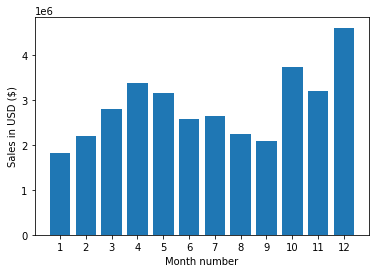

In [60]:
# visualize Sales column
months = range(1,13)
sales_usd = df.groupby(['Month']).sum()['Sales']

plt.bar(months, sales_usd)
plt.xticks(months)
plt.ylabel('Sales in USD ($)')
plt.xlabel('Month number')
plt.show();

#### Answer:
We can clearly see that December was the best month for sales in 2019 which was around 4615000 USD.

### Remove files

In [11]:
os.remove("./datasets/all_data.csv")